# kaggle房价预测

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

数据字段:

id - Unique ID for each home sold

date - Date of the home sale

price - Price of each home sold

bedrooms - Number of bedrooms

bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower

sqft_living - Square footage of the apartments interior living space

sqft_lot - Square footage of the land space

floors - Number of floors

waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not

view - An index from 0 to 4 of how good the view of the property was

condition - An index from 1 to 5 on the condition of the apartment,

grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.

sqft_above - The square footage of the interior housing space that is above ground level

sqft_basement - The square footage of the interior housing space that is below ground level

yr_built - The year the house was initially built

yr_renovated - The year of the house’s last renovation

zipcode - What zipcode area the house is in

lat - Lattitude

long - Longitude

sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors

sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

## 1.初步数据分析

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

加载数据，并初步查看数据，可见数据完整，没有缺失和重复现象。

In [24]:
raw_data = pd.read_csv('kc_house_data.csv')
raw_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [25]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [26]:
raw_data.duplicated().sum()

0

## 2.划分训练集和验证集，并标准化

In [27]:
X = raw_data.drop(['id', 'date', 'price'], axis=1)
y = raw_data['price']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1026)

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train= sc.transform(X_train)
X_test = sc.transform(X_test)

## 3.初步建立模型

选择K近邻回归、决策树回归、随机森林回归和梯度提升树回归等多个模型进行初步实验

In [47]:
import time
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [48]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=10)
time_start=time.time()
model.fit(X_train, y_train)
print('K近邻回归模型训练用时：', time.time()-time_start)
y_pred=model.predict(X_test)
print ('K近邻回归模型在验证集上的平均绝对误差、均方误差和R方值分别为：', 
       mean_absolute_error(y_test,y_pred), mean_squared_error(y_test,y_pred), r2_score(y_test,y_pred))

K近邻回归模型训练用时： 0.28101611137390137
K近邻回归模型在验证集上的平均绝对误差、均方误差和R方值分别为： 91041.56878470081 32515907041.252583 0.7719926355916296


In [49]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
time_start=time.time()
model.fit(X_train, y_train)
print('决策树回归模型训练用时：', time.time()-time_start)
y_pred=model.predict(X_test)
print ('决策树回归模型在验证集上的平均绝对误差、均方误差和R方值分别为：', 
       mean_absolute_error(y_test,y_pred), mean_squared_error(y_test,y_pred), r2_score(y_test,y_pred))

决策树回归模型训练用时： 0.27301549911499023
决策树回归模型在验证集上的平均绝对误差、均方误差和R方值分别为： 98991.8807063541 30491544294.025253 0.7861878297781613


In [11]:
from sklearn.ensemble import RandomForestRegressor 
model = RandomForestRegressor(n_estimators=500)
time_start=time.time()
model.fit(X_train, y_train)
print('随机森林回归模型训练用时：', time.time()-time_start)
y_pred=model.predict(X_test)
print ('随机森林回归模型在验证集上的平均绝对误差、均方误差和R方值分别为：', 
       mean_absolute_error(y_test,y_pred), mean_squared_error(y_test,y_pred), r2_score(y_test,y_pred))

随机森林回归模型训练用时： 83.69578719139099
随机森林回归模型在验证集上的平均绝对误差、均方误差和R方值分别为： 70227.1909673897 17132073455.97604 0.8798668322371602


In [50]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators=500)
time_start=time.time()
model.fit(X_train, y_train)
print('梯度提升树回归模型训练用时：', time.time()-time_start)
y_pred=model.predict(X_test)
print ('梯度提升树回归模型在验证集上的平均绝对误差、均方误差和R方值分别为：', 
       mean_absolute_error(y_test,y_pred), mean_squared_error(y_test,y_pred), r2_score(y_test,y_pred))

梯度提升树回归模型训练用时： 20.205155611038208
梯度提升树回归模型在验证集上的平均绝对误差、均方误差和R方值分别为： 69279.3658193719 14842967747.99907 0.8959184514851122


In [53]:
y_test.tolist()

[525000.0,
 290000.0,
 392000.0,
 84000.0,
 624950.0,
 603000.0,
 319990.0,
 170000.0,
 340000.0,
 430000.0,
 800000.0,
 1095000.0,
 372000.0,
 165000.0,
 525000.0,
 790000.0,
 1875000.0,
 750000.0,
 550000.0,
 890000.0,
 309000.0,
 1199500.0,
 1850000.0,
 1895000.0,
 610000.0,
 342000.0,
 292000.0,
 279950.0,
 490000.0,
 1054710.0,
 210000.0,
 287500.0,
 541500.0,
 720000.0,
 575000.0,
 349000.0,
 750000.0,
 645000.0,
 199500.0,
 925000.0,
 569000.0,
 412000.0,
 210000.0,
 398000.0,
 700000.0,
 530000.0,
 410000.0,
 273000.0,
 289275.0,
 450000.0,
 325000.0,
 263000.0,
 435000.0,
 383000.0,
 500000.0,
 398000.0,
 315000.0,
 295000.0,
 213500.0,
 425000.0,
 696000.0,
 1762000.0,
 379500.0,
 495000.0,
 430000.0,
 330000.0,
 377000.0,
 282000.0,
 544999.0,
 425000.0,
 583800.0,
 177000.0,
 1085000.0,
 429000.0,
 1700000.0,
 699000.0,
 325000.0,
 375000.0,
 329000.0,
 321000.0,
 579100.0,
 565000.0,
 331000.0,
 325000.0,
 365000.0,
 582000.0,
 428400.0,
 679990.0,
 530000.0,
 716000.0,
 4

In [54]:
y_pred.tolist()

[620537.4829069395,
 288066.6222991906,
 417351.9261118238,
 203963.7327533421,
 648981.911989366,
 593450.4152755155,
 331755.09668631613,
 272773.56902772345,
 354643.3813442502,
 392132.69956708676,
 1286907.5548075237,
 1018789.7682529961,
 368542.3150694013,
 252197.49893052637,
 431863.9846553523,
 797750.6903142101,
 2431454.102273652,
 1084790.559298425,
 790423.6494377423,
 783288.429743767,
 237945.86988225282,
 1064919.2410721944,
 1421235.6474476203,
 1545709.6614283687,
 612977.0848338605,
 311107.0751969414,
 339946.67348084366,
 243021.00492793936,
 584070.0055850334,
 1082796.772140234,
 259798.59284463385,
 310578.27478533506,
 523509.4168903685,
 562329.7908950454,
 621420.4985492929,
 324271.6604144747,
 686485.3799540558,
 645285.516231059,
 250928.26000679485,
 840033.7097948071,
 762591.1079233581,
 421398.09381651756,
 286866.6629975151,
 426276.1232815088,
 683708.2718638395,
 582229.0775366524,
 471551.33290974295,
 240161.68785679605,
 439888.19412402913,
 407

## 4.超参数调优

对用时最少、得分最高的梯度提升树回归模型进行超参数调优。具体采用网格搜索方法。

In [13]:
from sklearn.model_selection import GridSearchCV

model_slect = GradientBoostingRegressor()
parameters = {'loss': ['ls','lad','huber','quantile'], 'learning_rate':[0.1, 0.2], 'min_samples_leaf': [1,2,3,4]}
time_start=time.time()
model_gs = GridSearchCV(estimator=model_slect, param_grid=parameters, verbose=3)
model_gs.fit(X,y)
print('网络搜索用时：', time.time()-time_start)
print('最高得分:', model_gs.best_score_)
print('最好参数:', model_gs.best_params_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] learning_rate=0.1, loss=ls, min_samples_leaf=1 ..................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=0.1, loss=ls, min_samples_leaf=1, score=0.876, total=   4.8s
[CV] learning_rate=0.1, loss=ls, min_samples_leaf=1 ..................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.7s remaining:    0.0s


[CV]  learning_rate=0.1, loss=ls, min_samples_leaf=1, score=0.869, total=   4.8s
[CV] learning_rate=0.1, loss=ls, min_samples_leaf=1 ..................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.5s remaining:    0.0s


[CV]  learning_rate=0.1, loss=ls, min_samples_leaf=1, score=0.861, total=   4.7s
[CV] learning_rate=0.1, loss=ls, min_samples_leaf=1 ..................
[CV]  learning_rate=0.1, loss=ls, min_samples_leaf=1, score=0.853, total=   6.5s
[CV] learning_rate=0.1, loss=ls, min_samples_leaf=1 ..................
[CV]  learning_rate=0.1, loss=ls, min_samples_leaf=1, score=0.861, total=   5.0s
[CV] learning_rate=0.1, loss=ls, min_samples_leaf=2 ..................
[CV]  learning_rate=0.1, loss=ls, min_samples_leaf=2, score=0.878, total=   5.0s
[CV] learning_rate=0.1, loss=ls, min_samples_leaf=2 ..................
[CV]  learning_rate=0.1, loss=ls, min_samples_leaf=2, score=0.869, total=   4.7s
[CV] learning_rate=0.1, loss=ls, min_samples_leaf=2 ..................
[CV]  learning_rate=0.1, loss=ls, min_samples_leaf=2, score=0.861, total=   4.7s
[CV] learning_rate=0.1, loss=ls, min_samples_leaf=2 ..................
[CV]  learning_rate=0.1, loss=ls, min_samples_leaf=2, score=0.850, total=   4.7s
[CV] le

[CV]  learning_rate=0.1, loss=huber, min_samples_leaf=4, score=0.834, total=   6.6s
[CV] learning_rate=0.1, loss=huber, min_samples_leaf=4 ...............
[CV]  learning_rate=0.1, loss=huber, min_samples_leaf=4, score=0.842, total=   5.6s
[CV] learning_rate=0.1, loss=huber, min_samples_leaf=4 ...............
[CV]  learning_rate=0.1, loss=huber, min_samples_leaf=4, score=0.856, total=   5.9s
[CV] learning_rate=0.1, loss=huber, min_samples_leaf=4 ...............
[CV]  learning_rate=0.1, loss=huber, min_samples_leaf=4, score=0.851, total=   5.6s
[CV] learning_rate=0.1, loss=quantile, min_samples_leaf=1 ............
[CV]  learning_rate=0.1, loss=quantile, min_samples_leaf=1, score=0.756, total=   5.2s
[CV] learning_rate=0.1, loss=quantile, min_samples_leaf=1 ............
[CV]  learning_rate=0.1, loss=quantile, min_samples_leaf=1, score=0.735, total=   5.1s
[CV] learning_rate=0.1, loss=quantile, min_samples_leaf=1 ............
[CV]  learning_rate=0.1, loss=quantile, min_samples_leaf=1, scor

[CV]  learning_rate=0.2, loss=lad, min_samples_leaf=2, score=0.851, total=   5.0s
[CV] learning_rate=0.2, loss=lad, min_samples_leaf=3 .................
[CV]  learning_rate=0.2, loss=lad, min_samples_leaf=3, score=0.851, total=   5.3s
[CV] learning_rate=0.2, loss=lad, min_samples_leaf=3 .................
[CV]  learning_rate=0.2, loss=lad, min_samples_leaf=3, score=0.833, total=   5.0s
[CV] learning_rate=0.2, loss=lad, min_samples_leaf=3 .................
[CV]  learning_rate=0.2, loss=lad, min_samples_leaf=3, score=0.838, total=   5.0s
[CV] learning_rate=0.2, loss=lad, min_samples_leaf=3 .................
[CV]  learning_rate=0.2, loss=lad, min_samples_leaf=3, score=0.856, total=   5.0s
[CV] learning_rate=0.2, loss=lad, min_samples_leaf=3 .................
[CV]  learning_rate=0.2, loss=lad, min_samples_leaf=3, score=0.854, total=   5.0s
[CV] learning_rate=0.2, loss=lad, min_samples_leaf=4 .................
[CV]  learning_rate=0.2, loss=lad, min_samples_leaf=4, score=0.845, total=   5.0s


[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed: 14.1min finished


网络搜索用时： 850.472644329071
最高得分: 0.8771974305698761
最好参数: {'learning_rate': 0.2, 'loss': 'ls', 'min_samples_leaf': 3}


In [14]:
model = GradientBoostingRegressor(n_estimators=500, learning_rate=0.2,loss='ls',min_samples_leaf=4)
time_start=time.time()
model.fit(X_train, y_train)
print('调优后梯度提升树回归模型训练用时：', time.time()-time_start)
y_pred=model.predict(X_test)
print ('调优后梯度提升树回归模型在验证集上的平均绝对误差、均方误差和R方值分别为：', 
       mean_absolute_error(y_test,y_pred), mean_squared_error(y_test,y_pred), r2_score(y_test,y_pred))

调优后梯度提升树回归模型训练用时： 20.94319772720337
调优后梯度提升树回归模型在验证集上的平均绝对误差、均方误差和R方值分别为： 67721.28374524636 14424980969.361366 0.8988494496465295


## 5.特征选择

用相关系数来观察不同特征之间以及它们和标签值之间的相关性

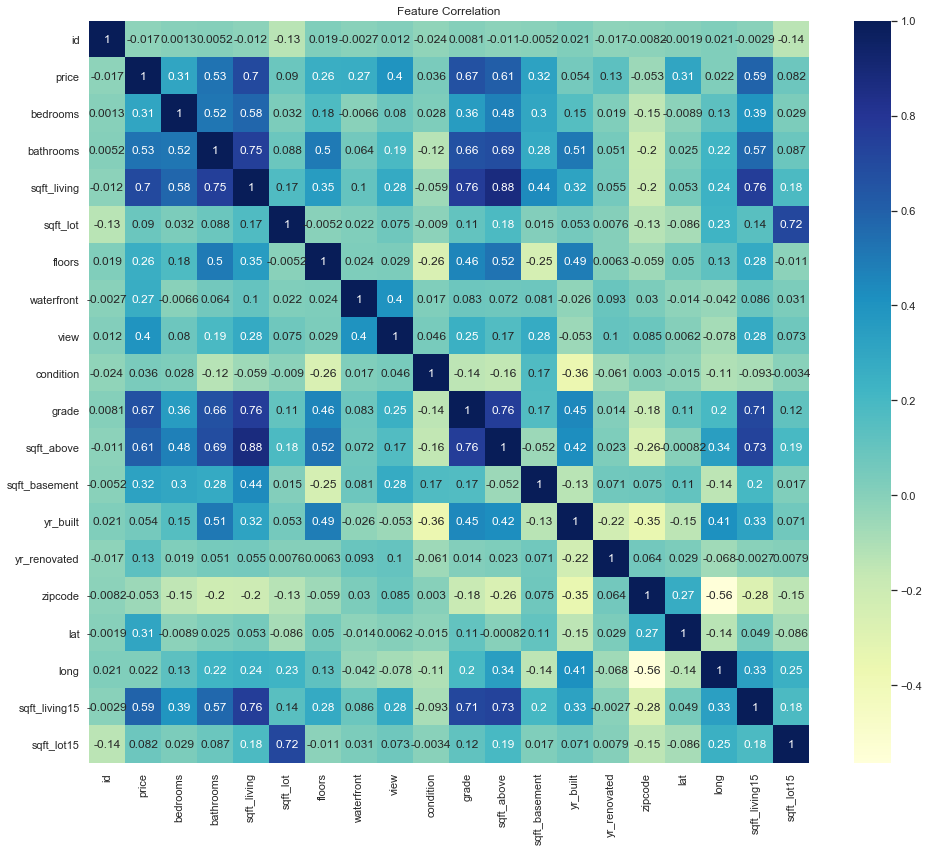

In [15]:
plt.figure(figsize=(14,12))
sns.heatmap(raw_data.corr(), annot=True, cmap="YlGnBu")
plt.title('Feature Correlation')
plt.tight_layout()
plt.show()

去掉与标签相关系数值较小的特征，重新训练模型，比较结果，发现得分略降低，但用时大幅下降

In [16]:
X1 = X.drop(['sqft_lot', 'condition', 'yr_built', 'zipcode', 'long', 'sqft_lot15'], axis=1)
#X1 = X.drop(['zipcode'], axis=1)
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=1026)
sc.fit(X1_train)
X1_train= sc.transform(X1_train)
X1_test = sc.transform(X1_test)

In [17]:
model = GradientBoostingRegressor(n_estimators=500, learning_rate=0.2,loss='ls',min_samples_leaf=4)
time_start=time.time()
model.fit(X1_train, y_train)
print('梯度提升树回归模型训练用时：', time.time()-time_start)
y_pred=model.predict(X1_test)
print ('梯度提升树回归模型在验证集上的平均绝对误差、均方误差和R方值分别为：', 
       mean_absolute_error(y_test,y_pred), mean_squared_error(y_test,y_pred), r2_score(y_test,y_pred))

梯度提升树回归模型训练用时： 10.76261568069458
梯度提升树回归模型在验证集上的平均绝对误差、均方误差和R方值分别为： 90933.70967487738 25969183875.528347 0.81789943107589


用散点图观察特征与标签的相关性

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


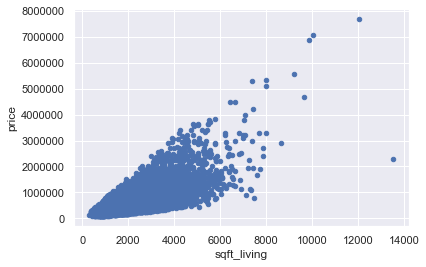

In [18]:
raw_data.plot(kind='scatter', x='sqft_living', y='price')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


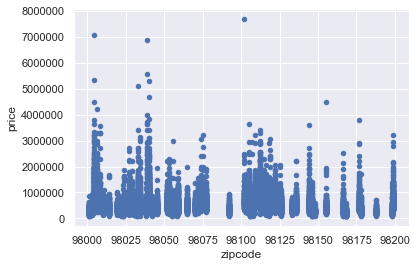

In [19]:
raw_data.plot(kind='scatter', x='zipcode', y='price')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


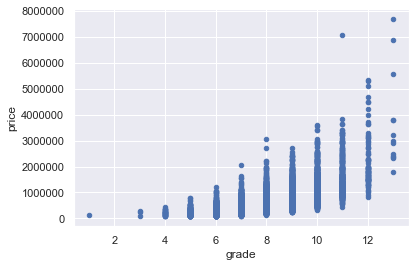

In [20]:
raw_data.plot(kind='scatter', x='grade', y='price')

依次去掉一个特征，进行模型训练，观察模型得分

In [21]:
columns = (X.columns).tolist()

In [22]:
for column in columns:
    X1 = X.drop([column], axis=1)
    #print(X1.columns)
    X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=1026)
    sc.fit(X1_train)
    X1_train= sc.transform(X1_train)
    X1_test = sc.transform(X1_test)
    time_start=time.time()
    model.fit(X1_train, y_train)
    print('去掉', column, '特征后的训练用时：', time.time()-time_start)
    y_pred=model.predict(X1_test)
    print ('平均绝对误差、均方误差和R方值分别为：', 
       mean_absolute_error(y_test,y_pred), mean_squared_error(y_test,y_pred), r2_score(y_test,y_pred), "\n")

去掉 bedrooms 特征后的训练用时： 20.881194353103638
平均绝对误差、均方误差和R方值分别为： 67857.9093675719 14464470845.953144 0.8985725395584585 

去掉 bathrooms 特征后的训练用时： 20.19915509223938
平均绝对误差、均方误差和R方值分别为： 67126.36324727612 13831852807.214973 0.9030085705603581 

去掉 sqft_living 特征后的训练用时： 19.787131786346436
平均绝对误差、均方误差和R方值分别为： 67947.91218956962 14233574159.885218 0.9001916284792806 

去掉 sqft_lot 特征后的训练用时： 17.616007804870605
平均绝对误差、均方误差和R方值分别为： 68539.53237498857 14986485884.710903 0.8949120766035826 

去掉 floors 特征后的训练用时： 20.54717516899109
平均绝对误差、均方误差和R方值分别为： 67649.1947401281 14508746260.732794 0.8982620724194306 

去掉 waterfront 特征后的训练用时： 21.44222617149353
平均绝对误差、均方误差和R方值分别为： 69895.8806509435 15408082945.69578 0.8919557624956748 

去掉 view 特征后的训练用时： 23.317333698272705
平均绝对误差、均方误差和R方值分别为： 69222.01088962647 14990259269.972923 0.8948856169502383 

去掉 condition 特征后的训练用时： 20.925196647644043
平均绝对误差、均方误差和R方值分别为： 68633.80412485365 14504228635.722874 0.8982937508151951 

去掉 grade 特征后的训练用时： 19.665124654769897
平均绝对误差、均方误差和R方值分

从R方值来看，第一应去掉的特征是sqft_basement。

## 6.神经网络模型

In [61]:
import tensorflow as tf
tf_model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation='relu', input_shape=(18,), kernel_initializer='random_uniform', bias_initializer='zeros'),
    tf.keras.layers.Dense(50, activation='relu', kernel_initializer='random_uniform', bias_initializer='zeros'),
    tf.keras.layers.Dense(1, activation='relu', kernel_initializer='random_uniform', bias_initializer='zeros')
])

In [66]:
batch_size = 50 # 每批训练样本数（批梯度下降法）
tf_epoch = 2000
tf_model.compile(optimiaer='adam', loss='mean_squared_error')
tf_model.fit(X_train.tolist(), y_train.tolist(), batch_size=batch_size, epochs=tf_epoch, verbose=1)
tf_model.summary()

Train on 15129 samples
Epoch 1/2000
15129/15129 [==============================] - 9s 571us/sample - loss: 31907316261.53111s - loss:
Epoch 2/2000
15129/15129 [==============================] - 4s 271us/sample - loss: 31850246679.1820
Epoch 3/2000
15129/15129 [==============================] - 6s 427us/sample - loss: 31817045979.7887
Epoch 4/2000
15129/15129 [==============================] - 6s 410us/sample - loss: 31775454493.5612
Epoch 5/2000
15129/15129 [==============================] - 7s 464us/sample - loss: 31755257802.7999
Epoch 6/2000
15129/15129 [==============================] - 7s 486us/sample - loss: 31685901299.2753
Epoch 7/2000
15129/15129 [==============================] - 8s 497us/sample - loss: 31666546040.0555
Epoch 8/2000
15129/15129 [==============================] - 6s 386us/sample - loss: 31651601164.8093
Epoch 9/2000
15129/15129 [==============================] - 7s 437us/sample - loss: 31605939070.1133
Epoch 10/2000
15129/15129 [==============================]

15129/15129 [==============================] - 3s 230us/sample - loss: 28919720901.2159
Epoch 154/2000
15129/15129 [==============================] - 7s 484us/sample - loss: 28915714849.1147
Epoch 155/2000
15129/15129 [==============================] - 4s 267us/sample - loss: 28924834292.6628
Epoch 156/2000
15129/15129 [==============================] - 5s 359us/sample - loss: 28906348035.4858
Epoch 157/2000
15129/15129 [==============================] - 5s 355us/sample - loss: 28895424758.1688
Epoch 158/2000
15129/15129 [==============================] - 7s 433us/sample - loss: 28890182702.5670s - loss: 279480
Epoch 159/2000
15129/15129 [==============================] - 6s 412us/sample - loss: 28827687507.4212
Epoch 160/2000
15129/15129 [==============================] - 7s 479us/sample - loss: 28837161186.3372s - los
Epoch 161/2000
15129/15129 [==============================] - 7s 466us/sample - loss: 28843534944.6197
Epoch 162/2000
15129/15129 [==============================] - 6s 

15129/15129 [==============================] - 6s 379us/sample - loss: 27061113977.4769
Epoch 305/2000
15129/15129 [==============================] - 5s 357us/sample - loss: 27031954051.1389
Epoch 306/2000
15129/15129 [==============================] - 7s 454us/sample - loss: 27023981862.5633
Epoch 307/2000
15129/15129 [==============================] - 6s 410us/sample - loss: 27072696550.9398s - loss: 2720877
Epoch 308/2000
15129/15129 [==============================] - 5s 321us/sample - loss: 27024793276.8061s - loss
Epoch 309/2000
15129/15129 [==============================] - 5s 351us/sample - loss: 27014359713.1908
Epoch 310/2000
15129/15129 [==============================] - 6s 387us/sample - loss: 26990068096.3130
Epoch 311/2000
15129/15129 [==============================] - 4s 281us/sample - loss: 26996857087.5093
Epoch 312/2000
15129/15129 [==============================] - 5s 344us/sample - loss: 26981205946.3526
Epoch 313/2000
15129/15129 [==============================] - 5

15129/15129 [==============================] - 5s 354us/sample - loss: 25703994688.0804
Epoch 459/2000
15129/15129 [==============================] - 6s 373us/sample - loss: 25671397222.6944
Epoch 460/2000
15129/15129 [==============================] - 5s 328us/sample - loss: 25684616122.3187
Epoch 461/2000
15129/15129 [==============================] - 4s 254us/sample - loss: 25667229353.3130s - loss: 25574779482.
Epoch 462/2000
15129/15129 [==============================] - 5s 316us/sample - loss: 25656571466.5546
Epoch 463/2000
15129/15129 [==============================] - 6s 428us/sample - loss: 25624818210.6207
Epoch 464/2000
15129/15129 [==============================] - 6s 393us/sample - loss: 25646695390.2931 - ETA: 0s - loss: 25541891913.
Epoch 465/2000
15129/15129 [==============================] - 5s 345us/sample - loss: 25641512675.7248
Epoch 466/2000
15129/15129 [==============================] - 6s 398us/sample - loss: 25618888207.8043
Epoch 467/2000
15129/15129 [=======

15129/15129 [==============================] - 5s 316us/sample - loss: 23977639342.3386
Epoch 612/2000
15129/15129 [==============================] - 6s 417us/sample - loss: 23949565443.0120
Epoch 613/2000
15129/15129 [==============================] - 4s 267us/sample - loss: 23930273729.6625
Epoch 614/2000
15129/15129 [==============================] - 5s 354us/sample - loss: 23922501178.2426s - los
Epoch 615/2000
15129/15129 [==============================] - 6s 367us/sample - loss: 23879351487.1413
Epoch 616/2000
15129/15129 [==============================] - 5s 327us/sample - loss: 23847599065.6905
Epoch 617/2000
15129/15129 [==============================] - 6s 383us/sample - loss: 23817411912.4056
Epoch 618/2000
15129/15129 [==============================] - 5s 353us/sample - loss: 23769703564.3778
Epoch 619/2000
15129/15129 [==============================] - 6s 373us/sample - loss: 23769353663.9365s - loss: 240609267
Epoch 620/2000
15129/15129 [==============================] - 

15129/15129 [==============================] - 5s 299us/sample - loss: 19256672517.2625s - loss: 18362578 - ETA: 0s - loss: 18836
Epoch 767/2000
15129/15129 [==============================] - 4s 257us/sample - loss: 19233115391.2047
Epoch 768/2000
15129/15129 [==============================] - 6s 396us/sample - loss: 19218331692.9764
Epoch 769/2000
15129/15129 [==============================] - 6s 413us/sample - loss: 19184119301.5501
Epoch 770/2000
15129/15129 [==============================] - 5s 349us/sample - loss: 19170641838.5078
Epoch 771/2000
15129/15129 [==============================] - 7s 466us/sample - loss: 19151302999.1608
Epoch 772/2000
15129/15129 [==============================] - 4s 240us/sample - loss: 19136267001.5869
Epoch 773/2000
15129/15129 [==============================] - 5s 351us/sample - loss: 19101966460.8104
Epoch 774/2000
15129/15129 [==============================] - 8s 499us/sample - loss: 19082438052.7612s - loss: 188979
Epoch 775/2000
15129/15129 [==

15129/15129 [==============================] - 5s 313us/sample - loss: 16872937516.5026
Epoch 920/2000
15129/15129 [==============================] - 5s 357us/sample - loss: 16856165173.0139
Epoch 921/2000
15129/15129 [==============================] - 5s 357us/sample - loss: 16860722829.7992
Epoch 922/2000
15129/15129 [==============================] - 6s 388us/sample - loss: 16843133236.9124
Epoch 923/2000
15129/15129 [==============================] - 6s 392us/sample - loss: 16839092633.4579
Epoch 924/2000
15129/15129 [==============================] - 5s 358us/sample - loss: 16820859332.9790
Epoch 925/2000
15129/15129 [==============================] - 5s 321us/sample - loss: 16817186818.9443s - loss: 16786904824.24
Epoch 926/2000
15129/15129 [==============================] - 5s 341us/sample - loss: 16790785649.2701
Epoch 927/2000
15129/15129 [==============================] - 6s 374us/sample - loss: 16784381498.5472
Epoch 928/2000
15129/15129 [==============================] - 5s

15129/15129 [==============================] - 5s 301us/sample - loss: 15666034328.59490s - loss: 15674164
Epoch 1069/2000
15129/15129 [==============================] - 4s 242us/sample - loss: 15660488755.7110
Epoch 1070/2000
15129/15129 [==============================] - 4s 264us/sample - loss: 15653460423.7880s - loss: 15420024289.
Epoch 1071/2000
15129/15129 [==============================] - 4s 277us/sample - loss: 15637522126.9118s - loss: 161
Epoch 1072/2000
15129/15129 [==============================] - 5s 301us/sample - loss: 15639133424.6187s - loss: 15727207122.5
Epoch 1073/2000
15129/15129 [==============================] - 4s 274us/sample - loss: 15631606402.1913s
Epoch 1074/2000
15129/15129 [==============================] - 5s 340us/sample - loss: 15613155862.6405
Epoch 1075/2000
15129/15129 [==============================] - 5s 343us/sample - loss: 15610920543.5706
Epoch 1076/2000
15129/15129 [==============================] - 4s 274us/sample - loss: 15611293859.9321s -

15129/15129 [==============================] - 4s 272us/sample - loss: 14899399291.4228
Epoch 1221/2000
15129/15129 [==============================] - 4s 246us/sample - loss: 14895824136.9174
Epoch 1222/2000
15129/15129 [==============================] - 4s 235us/sample - loss: 14892648621.3402
Epoch 1223/2000
15129/15129 [==============================] - 4s 237us/sample - loss: 14858519338.1844
Epoch 1224/2000
15129/15129 [==============================] - 4s 258us/sample - loss: 14889265818.1855
Epoch 1225/2000
15129/15129 [==============================] - 4s 274us/sample - loss: 14868791570.3256s - loss: 
Epoch 1226/2000
15129/15129 [==============================] - 4s 292us/sample - loss: 14841431618.0940s - loss:  - ETA: 0s -
Epoch 1227/2000
15129/15129 [==============================] - 3s 231us/sample - loss: 14879778660.2239
Epoch 1228/2000
15129/15129 [==============================] - 4s 244us/sample - loss: 14848180816.5446
Epoch 1229/2000
15129/15129 [===================

15129/15129 [==============================] - 4s 246us/sample - loss: 14266681003.6143s - loss: 14198
Epoch 1373/2000
15129/15129 [==============================] - 3s 225us/sample - loss: 14277497511.4516
Epoch 1374/2000
15129/15129 [==============================] - 4s 234us/sample - loss: 14270945885.9462
Epoch 1375/2000
15129/15129 [==============================] - 3s 182us/sample - loss: 14275190510.0805
Epoch 1376/2000
15129/15129 [==============================] - 3s 210us/sample - loss: 14261474251.4429
Epoch 1377/2000
15129/15129 [==============================] - 3s 227us/sample - loss: 14260405914.3208
Epoch 1378/2000
15129/15129 [==============================] - 3s 215us/sample - loss: 14269043702.8964
Epoch 1379/2000
15129/15129 [==============================] - 4s 291us/sample - loss: 14256674294.9641
Epoch 1380/2000
15129/15129 [==============================] - 4s 293us/sample - loss: 14259953366.4586
Epoch 1381/2000
15129/15129 [==============================] - 4s

15129/15129 [==============================] - 3s 175us/sample - loss: 13774672245.1112
Epoch 1525/2000
15129/15129 [==============================] - 3s 214us/sample - loss: 13761952703.1920
Epoch 1526/2000
15129/15129 [==============================] - 3s 221us/sample - loss: 13768053243.7697
Epoch 1527/2000
15129/15129 [==============================] - 4s 255us/sample - loss: 13766444803.8411
Epoch 1528/2000
15129/15129 [==============================] - 3s 220us/sample - loss: 13760272527.1698
Epoch 1529/2000
15129/15129 [==============================] - 3s 209us/sample - loss: 13768932312.9460
Epoch 1530/2000
15129/15129 [==============================] - 4s 237us/sample - loss: 13751960895.2005
Epoch 1531/2000
15129/15129 [==============================] - 4s 261us/sample - loss: 13758040398.1249
Epoch 1532/2000
15129/15129 [==============================] - 4s 280us/sample - loss: 13735483489.0935
Epoch 1533/2000
15129/15129 [==============================] - 3s 221us/sample -

15129/15129 [==============================] - 4s 288us/sample - loss: 13352153477.2202s 
Epoch 1677/2000
15129/15129 [==============================] - 5s 336us/sample - loss: 13348122973.2017
Epoch 1678/2000
15129/15129 [==============================] - 5s 320us/sample - loss: 13345138492.8315
Epoch 1679/2000
15129/15129 [==============================] - 5s 345us/sample - loss: 13364805863.7351
Epoch 1680/2000
15129/15129 [==============================] - 4s 272us/sample - loss: 13342088601.3225
Epoch 1681/2000
15129/15129 [==============================] - 4s 250us/sample - loss: 13344014205.5380
Epoch 1682/2000
15129/15129 [==============================] - 4s 283us/sample - loss: 13339181544.3104
Epoch 1683/2000
15129/15129 [==============================] - 4s 248us/sample - loss: 13344380405.2720s - loss: 13
Epoch 1684/2000
15129/15129 [==============================] - 4s 276us/sample - loss: 13329532100.5899
Epoch 1685/2000
15129/15129 [==============================] - 4s 

15129/15129 [==============================] - 4s 263us/sample - loss: 13163521651.0638
Epoch 1753/2000
15129/15129 [==============================] - 4s 234us/sample - loss: 13167021755.8586
Epoch 1754/2000
15129/15129 [==============================] - 4s 255us/sample - loss: 13170668768.1036
Epoch 1755/2000
15129/15129 [==============================] - 4s 284us/sample - loss: 13161973812.3540
Epoch 1756/2000
15129/15129 [==============================] - 5s 362us/sample - loss: 13175371079.3226
Epoch 1757/2000
15129/15129 [==============================] - 4s 264us/sample - loss: 13161519940.5137
Epoch 1758/2000
15129/15129 [==============================] - 5s 306us/sample - loss: 13159509095.4559
Epoch 1759/2000
15129/15129 [==============================] - 4s 253us/sample - loss: 13162382438.2714
Epoch 1760/2000
15129/15129 [==============================] - 4s 257us/sample - loss: 13148298352.9317
Epoch 1761/2000
15129/15129 [==============================] - 3s 211us/sample -

15129/15129 [==============================] - 7s 458us/sample - loss: 12832335484.0320s - loss: 12797574578.9
Epoch 1904/2000
15129/15129 [==============================] - 4s 271us/sample - loss: 12830274651.3234s 
Epoch 1905/2000
15129/15129 [==============================] - 5s 304us/sample - loss: 12829101847.6388
Epoch 1906/2000
15129/15129 [==============================] - 4s 288us/sample - loss: 12826743468.9003
Epoch 1907/2000
15129/15129 [==============================] - 4s 290us/sample - loss: 12828183044.4672
Epoch 1908/2000
15129/15129 [==============================] - 5s 344us/sample - loss: 12819570206.3227
Epoch 1909/2000
15129/15129 [==============================] - 3s 201us/sample - loss: 12822936524.6951
Epoch 1910/2000
15129/15129 [==============================] - 4s 242us/sample - loss: 12810871991.0868
Epoch 1911/2000
15129/15129 [==============================] - 4s 247us/sample - loss: 12828564370.1648
Epoch 1912/2000
15129/15129 [==========================

In [67]:
y_pred = tf_model.predict(X_test.tolist())
print ('平均绝对误差、均方误差和R方值分别为：', 
       mean_absolute_error(y_test,y_pred), mean_squared_error(y_test,y_pred), r2_score(y_test,y_pred))

平均绝对误差、均方误差和R方值分别为： 73302.36958040948 16589982477.299114 0.8836680712787428
